In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load and view data

In [107]:
data = pd.read_csv('europe.csv')
data.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


### Boxplot of numerical data

In [108]:
X = data.drop(columns='Country')

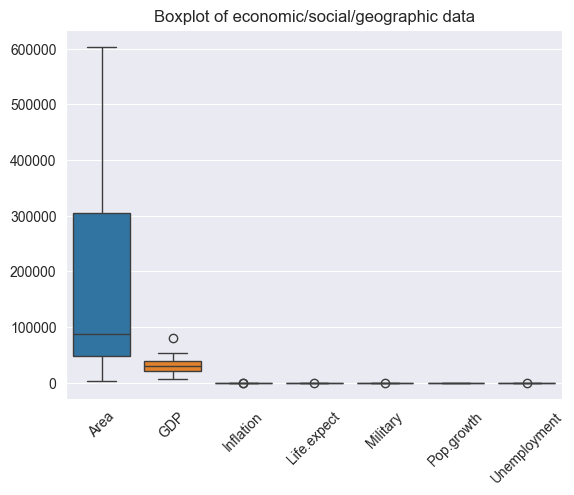

In [109]:
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title('Boxplot of economic/social/geographic data')
plt.show()

=> becomes evident that data should be normalized

### Normalize data

In [110]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

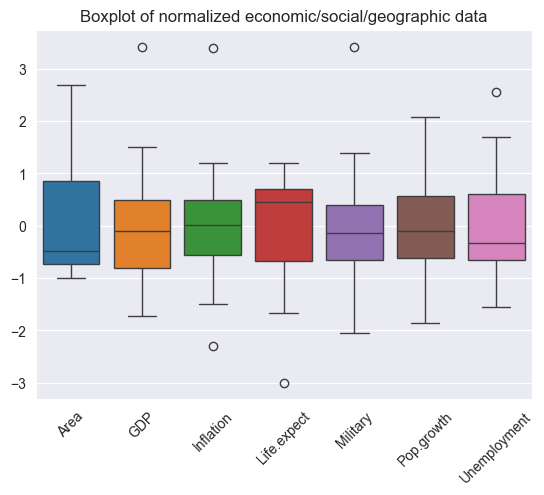

In [111]:
X_norm = sc.transform(X)

sns.boxplot(data=X_norm)
plt.xticks(rotation=45)
plt.title('Boxplot of normalized economic/social/geographic data')
plt.xticks(range(len(X.columns)), X.columns)
plt.show()

### Perform PCA

In [112]:
pca = PCA()
pca.fit(X_norm)

PCA()

In [113]:
def plot_spectre_variance_expl(valprop):
    tot = sum(np.abs(valprop))
    var_exp = [(i / tot) for i in sorted(np.abs(valprop), reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, valprop.size + 1), np.abs(valprop), alpha=0.5, align="center", label="Individual")
    plt.title("Correlation matrix Eigenvalues")
    plt.ylabel("Explained variance")
    plt.xlabel("Principal components")
    plt.subplot(1, 2, 2)
    markerline, stemlines, baseline = plt.stem(range(1, valprop.size + 1), cum_var_exp, "-r", label="Individual")
    plt.setp(stemlines, "color", "r", "linewidth", 2)
    plt.plot(range(1, valprop.size + 1), cum_var_exp, "b-.",label="Cumulative")
    plt.title("Cumulated explained variance (in %)")
    plt.ylabel("Explained variance")
    plt.xlabel("Principal components")
    plt.tight_layout()

Plot eigen-spectrum (explained variance of each projection axis)

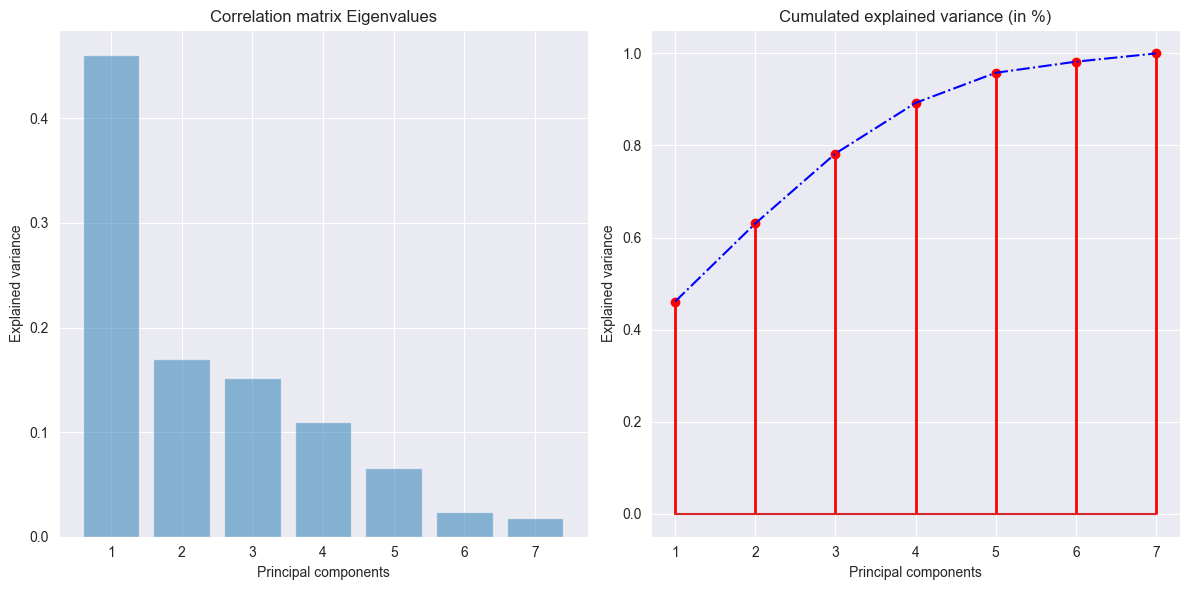

In [114]:
plot_spectre_variance_expl(pca.explained_variance_ratio_)

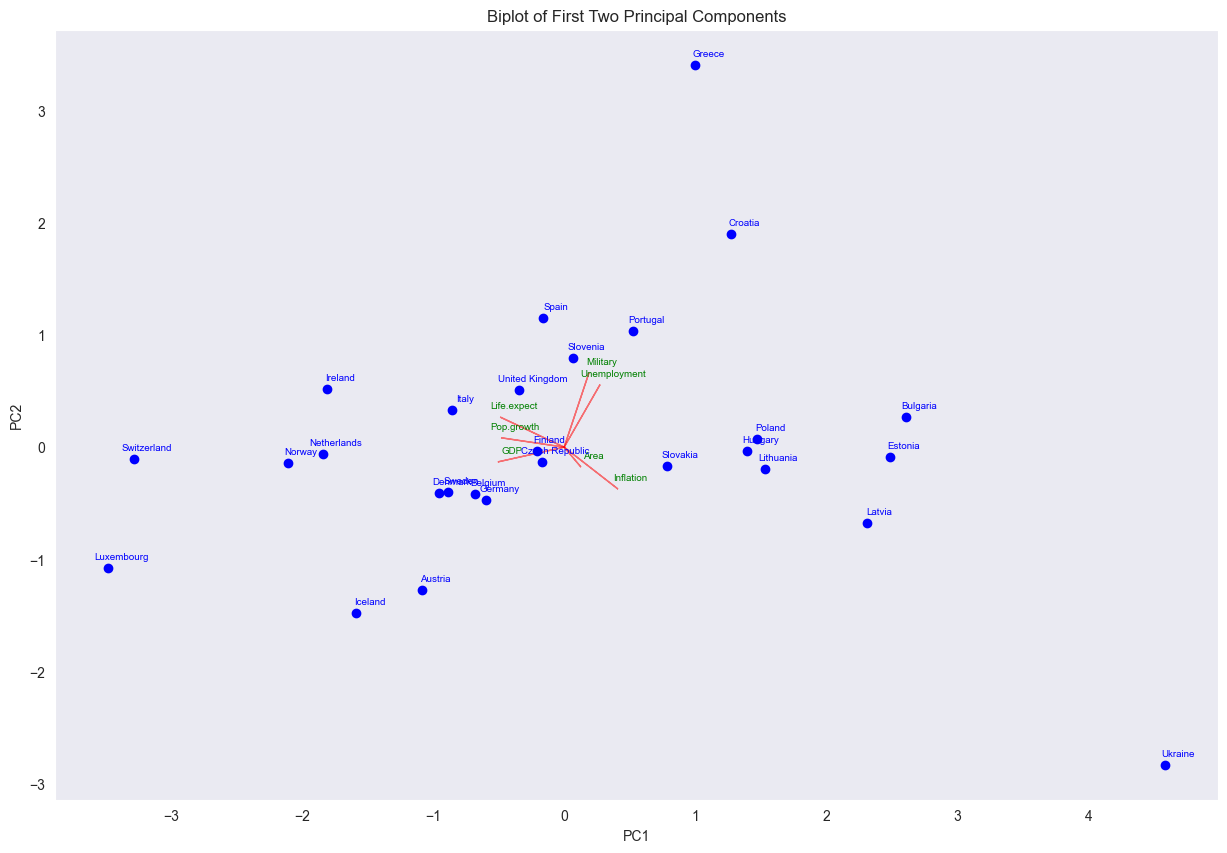

In [115]:
components = pca.components_

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]+0.1, coeff[i, 1]+0.1, features.columns[i], color='g', ha='center', va='center', fontsize=7)
        else:
            plt.text(coeff[i, 0]+0.1, coeff[i, 1]+0.1, labels[i], color='g', ha='center', va='center', fontsize=7)
    
    for j in range(score.shape[0]):
        plt.scatter(score[j, 0], score[j, 1], color='b')
        plt.text(score[j, 0]+0.1, score[j, 1]+0.1, data['Country'][j], color='b', ha='center', va='center', fontsize=7)

# Plot biplot
biplot(pca.transform(X_norm)[:, :2], pca.components_.T[:, :2], labels=X.columns)
plt.title('Biplot of First Two Principal Components')
plt.show()

### First component analysis (PC1)

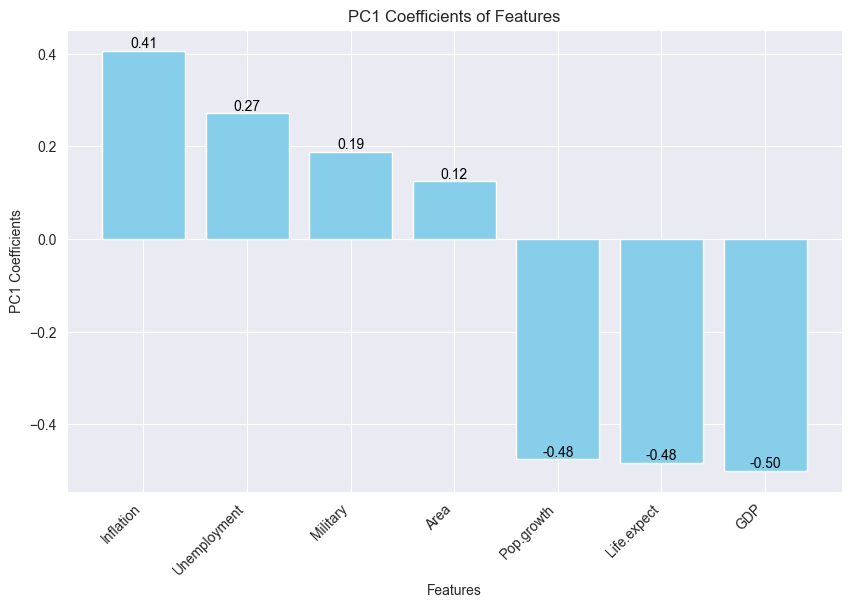

In [117]:
# Perform PCA using sklearn
pca1 = PCA(n_components=1)
pca1.fit(X_norm)

# Get the first principal component
first_pc = pca1.components_[0]

# Combine attribute names and their PC1 scores into a DataFrame
first_pc_combined = pd.DataFrame({'Attribute': X.columns, 'PC1': first_pc.squeeze()})
first_pc_sorted = first_pc_combined.sort_values(by='PC1', ascending=False) # sort by PC1 value

# Bar plot of coefficients (using sorted features)
plt.figure(figsize=(10, 6))
bars = plt.bar(first_pc_sorted['Attribute'], first_pc_sorted['PC1'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('PC1 Coefficients')
plt.title('PC1 Coefficients of Features')
plt.xticks(rotation=45, ha='right')

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', color='black') 
plt.show()

### Countries PC1

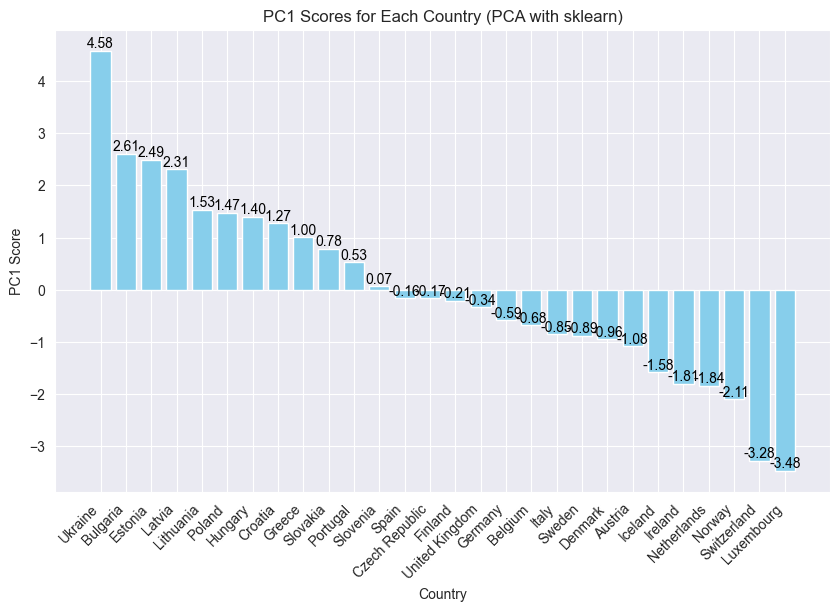

In [118]:
# Project the data onto the principal component
pc1_scores = pca1.transform(X_norm)

# Combine countries and their PC1 scores into a DataFrame
country_score = pd.DataFrame({'Country': data.iloc[:, 0], 'PC1': pc1_scores.squeeze()})

# Sort by PC1 in descending order
country_score_sorted = country_score.sort_values(by='PC1', ascending=False)
    
# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(country_score_sorted["Country"], country_score_sorted["PC1"],color='skyblue')
plt.xlabel("Country")
plt.ylabel("PC1 Score")
plt.title("PC1 Scores for Each Country (PCA with sklearn)")
plt.xticks(rotation=45, ha="right")

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", color="black")

plt.show()

### Conclusiones
__Variance explained:__ 

The variance explained for the first __three__ principal components is __78%__ (and 63% for the first two).


__PC1 impact:__

The attributes that have the largest impact are: 
- GDP
- Life expectancy
- Population growth
- Inflation (opposite direction)

A country with a high (positive) PC1 score, such as Ukraine will typically have:

High 
- Inflation
- Unemployment
- Military
- Area

Low
- Population growth
- Life expectancy
- GDP

A country with a "highly negative" PC1 score, such as Luxembourg will typically have the opposite. The absolute value of the attribute determine the impact of the attribute and the sign, in which direction.